In [7]:
from __future__ import division
import imp
import uproot
import matplotlib
#matplotlib.use('agg')
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import pandas as pd
import os
import ROOT
import time
import math
helper = imp.load_source('helpfunction','/home/tmettler/Desktop/uBoone/do_plots/helpfunction.py')
#import /home/tmettler/Desktop/uBoone/do_plots/helpfunction as helper
import collections
NuCC = imp.load_source('NuCC_function','/home/tmettler/Desktop/uBoone/do_plots/NuCC_function.py')

Welcome to JupyROOT 6.10/08


In [8]:
#get input file and output folder for plots
inputdir = '/home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/'
outputdir = '/home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/pre_muon_selection/'
try:
    os.stat(outputdir)
except:
    os.mkdir(outputdir)

filename = 'NuCCana_overlay_V25.rootout33.root' 

In [9]:
#file_tree = uproot.open(inputdir+filename)['numuCCAna/event']
file_tree = uproot.open(inputdir+filename)['t_out']
print 'length of event tree', file_tree.numentries
#print([c.decode('UTF-8') for c in file_tree.keys()])

length of event tree 1070522


In [10]:
cols = ['fEvtNum','frunNum','fsubRunNum','MCTrackPDG', 'MCTrackPurity', 'TrackPID_chiproton',\
        'TrackPID_chimuon','TrackPID_chipion','TrackLength','num_mc_muon','track_key','key_muon']
        
ev = file_tree.pandas.df(cols)

In [11]:
#tree_Event['has_muon'] = tree_Event['MCTrackPDG'].ne(13)
ev.head(10)
#tree_Event.index.names

fEvtNum  frunNum  fsubRunNum  MCTrackPDG  MCTrackPurity  \
entry subentry                                                            
0     0             253    16265           5        13.0       0.960593   
3     0             263    16265           5        13.0       0.978050   
      1             263    16265           5      2212.0       0.988959   
      2             263    16265           5      2212.0       0.990159   
4     0             267    16265           5        13.0       0.976117   
      1             267    16265           5      2212.0       0.814867   
6     0             272    16265           5        13.0       0.988281   
      1             272    16265           5      2212.0       1.000000   
      2             272    16265           5      2212.0       0.935273   
8     0             291    16265           5        13.0       0.936826   

                TrackPID_chiproton  TrackPID_chimuon  TrackPID_chipion  \
entry subentry                                                           
0     0                 141.720871          6.895039          6.984430   
3     0                 208.640289          8.576671         13.129293   
      1                 127.244804          4.662293          6.527868   
      2                   7.874557         47.803963         44.511631   
4     0                 132.163513          4.724015          4.890599   
      1                  27.751570         15.440325         12.135176   
6     0                 252.639847         12.249627         20.953836   
      1                   1.765308          3.277233          3.152843   
      2                 167.790527         18.208078         25.685921   
8     0                 197.807434         12.844907         18.494297   

                TrackLength  num_mc_muon  track_key  key_muon  
entry subentry                                                 
0     0          272.450762            1          2         2  
3     0          190.593743            1          6         6  
      1           13.058761            1         15         6  
      2           16.317026            1         14         6  
4     0          456.941857            1          0         0  
      1            1.961809            1         28         0  
6     0          115.441180            1          6         6  
      1            3.206996            1         21         6  
      2            1.430780            1         26         6  
8     0          152.234046            1          9         9

In [12]:
ev2 = ev.query('TrackPID_chimuon/TrackPID_chiproton<10').groupby(['frunNum','fsubRunNum'])['TrackLength'].max()

In [13]:
ev2.head()

frunNum  fsubRunNum
14117    0             181.388865
         3             566.431501
         4             270.905840
         11             98.477552
         20            101.202916
Name: TrackLength, dtype: float64

In [14]:
ev['proton'] = ev.query('TrackPID_chimuon/TrackPID_chiproton<10').groupby(['frunNum','fsubRunNum'])['TrackLength'].transform(max)

In [15]:
print ev.query('proton==TrackLength & MCTrackPDG==13').shape[0]
print ev.query('proton==TrackLength').shape[0]
print ev.query('proton==TrackLength & num_mc_muon>0').shape[0]


82223
100827
85375


In [16]:
num_bins = 7
eff_tot = np.zeros((num_bins, num_bins))
for i in range(num_bins):
    for j in range(num_bins):
        cut = 'num_mc_muon>0 & TrackPID_chimuon/TrackPID_chiproton<' + str(0.8-i/num_bins*0.8) + \
        '& TrackPID_chimuon/TrackPID_chipion<'+ str(1.6-j/num_bins*0.8)
        ev['proton'] = ev.query(cut).groupby(['frunNum','fsubRunNum'])['TrackLength'].transform(max)
        eff = ev.query('proton==TrackLength & MCTrackPDG==13').shape[0]/ev.query('proton==TrackLength').shape[0]
        eff2 = ev.query('proton==TrackLength & MCTrackPDG==13').shape[0]/ev.query('num_mc_muon>0').groupby(['frunNum','fsubRunNum'])['TrackLength'].max().shape[0]
        print eff,eff2,i,j
        eff_tot[i,j] = eff*eff2

0.964620025501 0.96677471637 0 0
0.964597825073 0.966712380002 0 1
0.964564888345 0.966629264846 0 2
0.964681605608 0.966535760296 0 3
0.965322597381 0.96654614969 0 4
0.96546952704 0.96412542077 0 5
0.962009251198 0.952884095915 0 6
0.964888819779 0.967024061838 1 0


KeyboardInterrupt: 

In [ ]:
print 'proton then pion'

fig = plt.figure(figsize=(6, 3.2))

ax = fig.add_subplot(111)
ax.set_title('colorMap')
plt.imshow(eff_tot)
ax.set_aspect('equal')

cax = fig.add_axes([0.12, 0.1, 0.78, 0.8])
cax.get_xaxis().set_visible(False)
cax.get_yaxis().set_visible(False)
cax.patch.set_alpha(0)
cax.set_frame_on(False)
plt.colorbar(orientation='vertical')
plt.show() 
#np.amax(passing)

result = np.where(eff_tot == np.amax(eff_tot))
print 'First pion then proton, max value:' , np.max(eff_tot) 
print 'First pion then proton, index:' , eff_tot.argmax()
print('Returned tuple of arrays :', result)


In [ ]:
dublicates_all = ev[ev.duplicated(['frunNum','fsubRunNum','fEvtNum'],keep=False)]

In [ ]:
ev_sort = ev.sort_values(by=['TrackLength'])

In [ ]:
ev_proton = ev_sort.query('TrackPID_chimuon/TrackPID_chiproton<0.1')

In [ ]:
ev_pion = ev_proton.query('TrackPID_chimuon/TrackPID_chipion<1')

In [ ]:
ev_all = pd.concat([ev_sort,ev_proton,ev_pion])

In [17]:
dublicates_all = ev[ev.duplicated(['frunNum','fsubRunNum','fEvtNum'],keep='last')]

In [18]:
dublicates_all.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 449890 entries, (3, 0) to (1070516, 0)
Data columns (total 13 columns):
fEvtNum               449890 non-null uint32
frunNum               449890 non-null uint32
fsubRunNum            449890 non-null uint32
MCTrackPDG            449890 non-null float64
MCTrackPurity         449890 non-null float64
TrackPID_chiproton    449890 non-null float64
TrackPID_chimuon      449890 non-null float64
TrackPID_chipion      449890 non-null float64
TrackLength           449890 non-null float64
num_mc_muon           449890 non-null int32
track_key             449890 non-null int32
key_muon              449890 non-null int32
proton                281078 non-null float64
dtypes: float64(7), int32(3), uint32(3)
memory usage: 39.9 MB


In [29]:
ev_sort = ev.query('TrackPID_chimuon>-1 & num_mc_muon>0 & TrackLength>8 & MCTrackPurity>0.5').sort_values(by=['TrackLength'],ascending=False)
print ev_sort.shape
tot_muons = ev_sort[ev_sort.duplicated(['frunNum','fsubRunNum','fEvtNum'],keep='last')].shape[0]
print tot_muons
eff_ini = ev_sort[ev_sort.duplicated(['fEvtNum','frunNum','fsubRunNum'],keep='last')].query('MCTrackPDG==13 & MCTrackPurity>0.5').shape[0]/tot_muons
print eff_ini
eff_ini = ev_sort.query('MCTrackPDG==13 & track_key==key_muon').shape[0]/tot_muons
print eff_ini
#tot_muons = ev_sort.query('MCTrackPDG==13').shape[0]
#print tot_muons

(462787, 13)
163358
0.713855458563
1.72810024609


In [35]:
num_bins = 30
ev_sort = ev.query('TrackPID_chimuon>-1 & num_mc_muon>0 & TrackLength>8 & MCTrackPurity>0.5').sort_values(by=['TrackLength'],ascending=True)
print ev_sort.shape
eff_tot = np.zeros((num_bins, num_bins))
for i in range(num_bins):
    for j in range(num_bins):
        cut = 'TrackPID_chimuon/TrackPID_chiproton<' + str(0.3-i/num_bins*0.3)
        cut2 ='TrackPID_chimuon/TrackPID_chipion<'+ str(0.9-j/num_bins*0.3)
        ev_proton = ev_sort.query(cut).copy()
        #print ev_proton.shape
        ev_pion = ev_proton.query(cut2).copy()
        #print ev_pion.shape
        ev_all = pd.concat([ev_pion.reset_index(drop=True),ev_proton.reset_index(drop=True),ev_sort.reset_index(drop=True)]).drop_duplicates().reset_index(drop=True)#.drop_duplicates(keep='first').reset_index(drop=True)
        #ev_all = ev_pion.copy()
        #print 'shape ev_all',ev_all.shape
        ##ev_all.append(ev_proton.reset_index(drop=True))
        #print 'shape ev_all',ev_all.shape
        #ev_all.append(ev_sort,ignore_index = True)
        #print 'shape ev_all',ev_all.shape
        #print 'shape ev_all' ,ev_all.shape
        dublicates_all = ev_all[ev_all.duplicated(['fEvtNum','frunNum','fsubRunNum'],keep='last')]
        #dublicates_all.drop_duplicates(['frunNum','fsubRunNum','fEvtNum'],keep='last')
        pur = dublicates_all.query('MCTrackPDG==13').shape[0]/tot_muons
        #print 'shape dublicates_all' ,ev_all[ev_all.duplicated(['frunNum','fsubRunNum','fEvtNum'],keep='last')].shape
        #print 'shape dublicates_all' ,ev_all[ev_all.duplicated(['frunNum','fsubRunNum','fEvtNum'],keep=False)].shape
        eff = dublicates_all.shape[0]/tot_muons
        #eff2 = ev.query('proton==TrackLength & MCTrackPDG==13').shape[0]/ev.query('num_mc_muon>0').groupby(['frunNum','fsubRunNum'])['TrackLength'].max().shape[0]
        print pur,i,j
        eff_tot[i,j] = pur

(462787, 13)
0.692038345229 0 0
0.693054518297 0 1
0.69406456984 0 2
0.694939947845 0 3
0.695705138408 0 4
0.696562151838 0 5
0.697229398009 0 6
0.697890522656 0 7
0.69839860919 0 8
0.698974032493 0 9
0.69925562262 0 10
0.699616792566 0 11
0.699824924399 0 12
0.699671886287 0 13
0.699451511404 0 14
0.699151556704 0 15
0.698043560768 0 16
0.69728449173 0 17
0.696011214633 0 18
0.694658357717 0 19
0.692723955974 0 20
0.690709974412 0 21
0.687692062831 0 22
0.684723123447 0 23
0.681093059416 0 24
0.677279349649 0 25
0.672902459629 0 26
0.668127670515 0 27
0.664050735195 0 28
0.659514685537 0 29
0.692105681999 1 0
0.693134098116 1 1
0.694144149659 1 2
0.695025649188 1 3
0.6958030828 1 4
0.69666009623 1 5
0.697351828499 1 6
0.698037439244 1 7
0.698570011876 1 8
0.699151556704 1 9
0.699451511404 1 10
0.69981268135 1 11
0.700082028428 1 12
0.69993511184 1 13
0.699733101532 1 14
0.699451511404 1 15
0.698392487665 1 16
0.6976517832 1 17
0.69641523525 1 18
0.695099107482 1 19
0.693189191836 1 20

In [ ]:
ev_all.head(3)


In [ ]:
dublicates_all.tail(10)

proton then pion


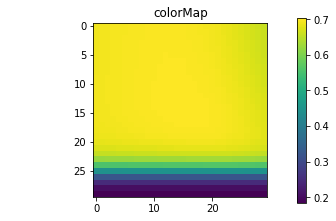

First pion then proton, max value: 0.7028305929308635
First pion then proton, index: 435
('Returned tuple of arrays :', (array([14]), array([15])))


In [37]:
print 'proton then pion'

fig = plt.figure(figsize=(6, 3.2))

ax = fig.add_subplot(111)
ax.set_title('colorMap')
plt.imshow(eff_tot)
ax.set_aspect('equal')

cax = fig.add_axes([0.12, 0.1, 0.78, 0.8])
cax.get_xaxis().set_visible(False)
cax.get_yaxis().set_visible(False)
cax.patch.set_alpha(0)
cax.set_frame_on(False)
plt.colorbar(orientation='vertical')
plt.show() 
#np.amax(passing)

result = np.where(eff_tot == np.amax(eff_tot))
print 'First pion then proton, max value:' , np.max(eff_tot) 
print 'First pion then proton, index:' , eff_tot.argmax()
print('Returned tuple of arrays :', result)


In [38]:
i = 14.0
j = 15.0
num_bins = 30

cut = 'TrackPID_chimuon/TrackPID_chiproton<' + str(0.3-(0)/num_bins*0.3)
cut2 ='TrackPID_chimuon/TrackPID_chipion<'+ str(0.9-(0)/num_bins*0.3)
print cut
print cut2
cut = 'TrackPID_chimuon/TrackPID_chiproton<' + str(0.3-i/num_bins*0.3)
cut2 ='TrackPID_chimuon/TrackPID_chipion<'+ str(0.9-j/num_bins*0.3)
print cut
print cut2
cut = 'TrackPID_chimuon/TrackPID_chiproton<' + str(0.3-(30)/num_bins*0.3)
cut2 ='TrackPID_chimuon/TrackPID_chipion<'+ str(0.9-(30)/num_bins*0.3)
print cut
print cut2

TrackPID_chimuon/TrackPID_chiproton<0.3
TrackPID_chimuon/TrackPID_chipion<0.9
TrackPID_chimuon/TrackPID_chiproton<0.16
TrackPID_chimuon/TrackPID_chipion<0.75
TrackPID_chimuon/TrackPID_chiproton<0.0
TrackPID_chimuon/TrackPID_chipion<0.6


In [4]:
i = 17.0
j = 13.0
num_bins = 20

cut = 'TrackPID_chimuon/TrackPID_chiproton<' + str(0.8-i/num_bins*0.8)
cut2 ='TrackPID_chimuon/TrackPID_chipion<'+ str(1.2-j/num_bins*0.8)
print cut
print cut2

TrackPID_chimuon/TrackPID_chiproton<0.12
TrackPID_chimuon/TrackPID_chipion<0.68
